In [2]:
# Importações de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ler o arquivo
df = pd.read_csv(r'C:\Users\renat\RenataAndradeSantana-Analise_de_Boa_Leitura\oodReads_books_limpo.csv', encoding= 'utf-8-sig')
df.head()

,author,desc,genre,img,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jeffrey Pfeffer,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119


#Explorar e visualizar a distribuição de classificação (ratings), gênero (genre) e autores(author) mais populares

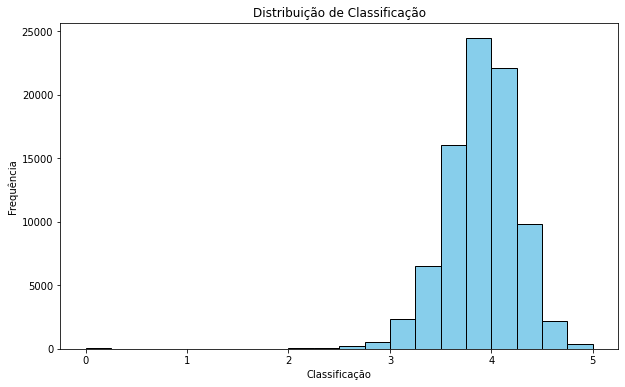

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Classificação')
plt.xlabel('Classificação')
plt.ylabel('Frequência')
plt.show()


In [5]:
# Generos mais avaliados:
df['genre'].nunique()

70037

In [6]:
df.groupby('genre')['rating'].sum().sort_values(ascending=False)


genre
Nonfiction                                 1569.99
History                                    1383.17
Games,Chess                                 711.12
Esoterica,Astrology                         624.12
History,Nonfiction                          481.49
                                            ...   
History,Japanese History,Nonfiction           0.00
Anthropology,Ethnography,Cultural,China       0.00
Feminism,Gender                               0.00
Computers,Internet,Internet,Web               0.00
Sequential Art,Cartoon                        0.00
Name: rating, Length: 70037, dtype: float64

In [7]:
# Considerando o primeiro e segundo gênero como sendo o gênero mais significante de livro
df['genre'] = df['genre'].str.split(',').str[:2]  # Dividir e pegar apenas os dois primeiros gêneros
df['genre']= df['genre'].apply(lambda x: ', '.join(x))# Converter a lista em string, separando os gêneros por vírgula
df['genre'] 

0        History, Military History
1                 Couture, Fashion
2                Politics, History
3                   Labor, History
4             Business, Leadership
                   ...            
84846      Nonfiction, Environment
84847           Animals, Childrens
84848     Christianity, Evangelism
84849          Nonfiction, History
84850          Fantasy, Paranormal
Name: genre, Length: 84851, dtype: object

In [8]:
generos_count  = df['genre'].value_counts()
generos_count

genre
Childrens, Picture Books          2519
Sequential Art, Manga             2210
History, Nonfiction               1972
Historical, Historical Fiction    1960
Sequential Art, Comics            1821
                                  ... 
Sociology, Marriage                  1
Leadership, Psychology               1
Humor, Holiday                       1
Historical, Adult Fiction            1
Reference, Couture                   1
Name: count, Length: 3167, dtype: int64

In [9]:
# Filtrar apenas os gêneros com contagem maior que 100
generos_filtrados = generos_count[generos_count > 800]
generos_filtrados 

genre
Childrens, Picture Books          2519
Sequential Art, Manga             2210
History, Nonfiction               1972
Historical, Historical Fiction    1960
Sequential Art, Comics            1821
Romance, M M Romance              1610
Romance, Romance                  1313
Romance, Historical Romance        989
Food and Drink, Cookbooks          886
Mystery, Fiction                   838
Name: count, dtype: int64

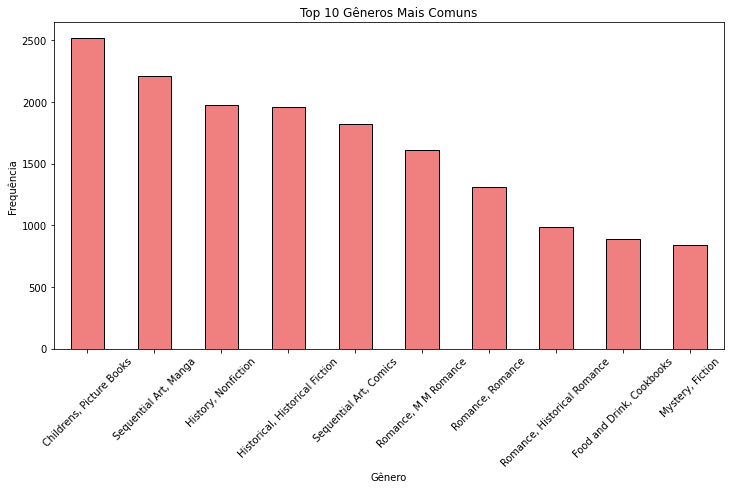

In [10]:
# Gráfico de barras dos gêneros mais comuns
plt.figure(figsize=(12, 6))
generos_filtrados .plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Gêneros Mais Comuns')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Contar a frequência de cada autor
autores_count = df['author'].value_counts().head(10)  # Top 10 autores
autores_count

author
R.L. Stine              71
Lynn Hagen              62
Elinor M. Brent-Dyer    59
Lynne Graham            55
Louis L'Amour           55
Joyee Flynn             53
Agatha Christie         52
Bonnie Bryant           48
Harry Turtledove        46
Mi-Ri Hwang             46
Name: count, dtype: int64

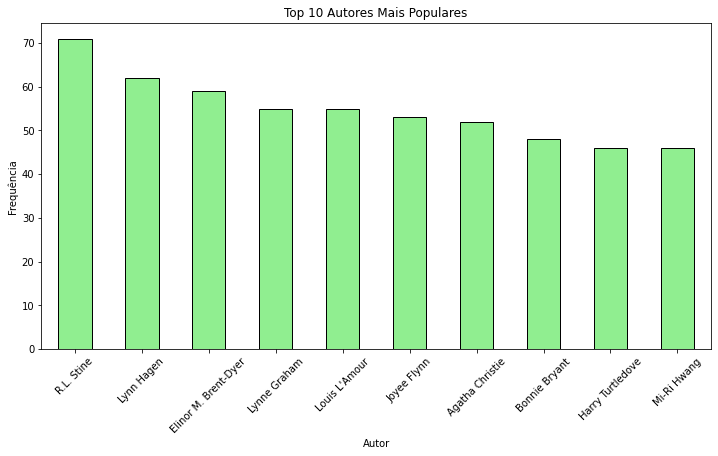

In [12]:
# Gráfico de barras dos autores mais populares
plt.figure(figsize=(12, 6))
autores_count.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Autores Mais Populares')
plt.xlabel('Autor')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


#Estatística do libro mais ou menos bem avaliado

In [13]:
df['rating'].describe()

count    84851.000000
mean         3.893095
std          0.366897
min          0.000000
25%          3.690000
50%          3.910000
75%          4.130000
max          5.000000
Name: rating, dtype: float64

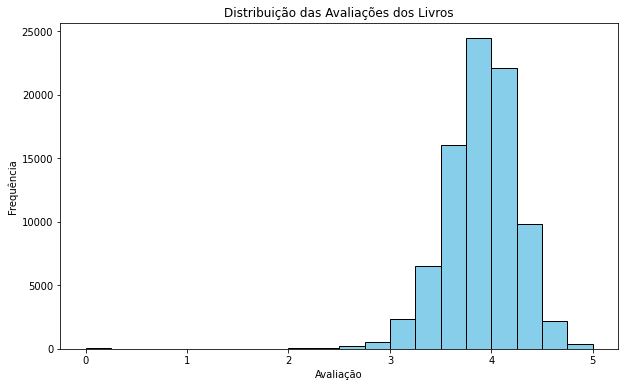

In [14]:
# Visualização da distribuição das avaliações
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição das Avaliações dos Livros')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.show()



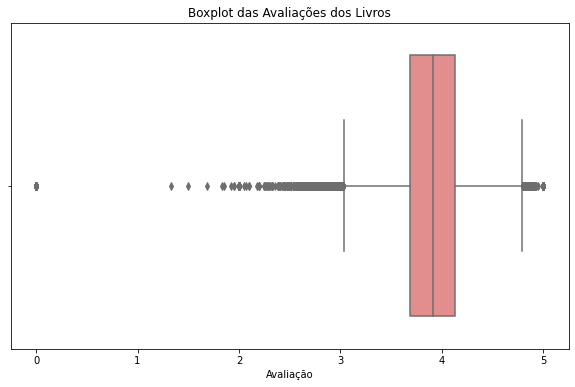

In [15]:
# Boxplot para ver a distribuição da avaliação
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['rating'], color='lightcoral')
plt.title('Boxplot das Avaliações dos Livros')
plt.xlabel('Avaliação')
plt.show()

In [19]:
# 1.Títulos Mais Bem Avaliados (média de avaliação)
top_avaliados = df.groupby('title')['rating'].mean()
top_avaliados


title
"Daisuki."                                                                               3.77
"Dark Pictures" and Other Stories                                                        3.60
"Defects": Engendering the Modern Body                                                   4.50
"Have-More" Plan, The                                                                    4.36
"Headhunter" Hiring Secrets: The Rules of the Hiring Game Have Changed . . . Forever!    3.72
                                                                                         ... 
ì•„ì´ëŒ ì‡¼í•‘. 7                                                                      3.90
ì•„ì´ëŒ ì‡¼í•‘. 8                                                                      3.96
ì•…ì˜ ê½ƒ 5                                                                             3.95
í•˜ë°±ì˜ ì‹ ë¶€ 14                                                                      3.95
í•˜ë°±ì˜ ì‹ ë¶€ 15                                   

In [17]:
tops_5 = top_avaliados[top_avaliados >=5]
tops_5

title
50 Fabulous Pineapple Motifs to Crochet (Leisure Arts #4864)                                                                                     5.0
A Mediterranean Society, Volume V: The Jewish Communities of the Arab World as Portrayed in the Documents of the Cairo Geniza, The Individual    5.0
A Palaeographic Study of Early Writing in Egypt                                                                                                  5.0
A Political Companion to Ralph Waldo Emerson                                                                                                     5.0
African Zion: Studies in Black Judaism                                                                                                           5.0
                                                                                                                                                ... 
Work Under Capitalism (New Perspectives in Sociology (Boulder, Colo.)                               

In [18]:
tops_5.count()

135

In [20]:
tops_menor_nota = top_avaliados[top_avaliados <=2]
tops_menor_nota 

title
24-Hour Sewing Projects                                                                                                    2.00
A History of Chemistry from Earliest Times to the Present Day                                                              0.00
A Megabyte Of Computer Jokes (Joke Books S.)                                                                               0.00
A Political History of the Civil War in Angola, 1974-1990                                                                  0.00
A Princesa Do Gelo (DN Contos Digitais, #26)                                                                               1.68
                                                                                                                           ... 
Warship 1999-2000                                                                                                          0.00
Weimar Culture and Quantum Mechanics: Selected Papers by Paul Forman and Contemporary Perspectives

In [21]:
tops_menor_nota.count()

122

In [22]:
# Top dos livros com melhor avaliação (notas = 5)
top_5_livros = df[['title', 'rating']].nlargest(100, 'rating')
print("Top 5 Livros Mais Bem Avaliados:")
print(top_5_livros)

Top 5 Livros Mais Bem Avaliados:
                                                   title  rating
34             Ru 486: Misconceptions, Myths, and Morals     5.0
71                Jazz Country: Ralph Ellison in America     5.0
130    Queen's Mate: Three Women of Power in France o...     5.0
792    Offerings to the Discerning Eye: An Egyptologi...     5.0
852    The Adventure of Reason: Interplay Between Phi...     5.0
...                                                  ...     ...
59041  Eastern Influences on Western Philosophy: A Re...     5.0
59267              Newton and the Origin of Civilization     5.0
59413                                      Rhodesia File     5.0
59531  Becoming Plural: Travels in the Sudan, Travels...     5.0
60619                                       James Havard     5.0

[100 rows x 2 columns]


In [23]:
# Top 5 livros com pior avaliação (menor rating notas menores que 2)
piores_5_livros = df[['title', 'rating']].nsmallest(100, 'rating')
print("Top 5 Livros Menos Bem Avaliados:")
print(piores_5_livros)

Top 5 Livros Menos Bem Avaliados:
                                                   title  rating
206    The Unemployed People's Movement: Leftists, Li...    0.00
286                  Foliations and Geometric Structures    0.00
1304              Mac 2000: Cartoons from the Daily Mail    0.00
1466                                Russia and the Peace    0.00
2967                                   That Imp Marcella    0.00
...                                                  ...     ...
73707  Um rio chamado AngÃºstia (DN Contos Digitais, #5)    1.85
64844  Sucking the Soccer Players: The Player and Coa...    1.92
4102                                             Stretch    1.95
75117      Defensor do VÃ­nculo (DN Contos Digitais #12)    1.95
502           The Alterman Gambit Guide: Black Gambits 1    2.00

[100 rows x 2 columns]


In [24]:
# Estatísticas para os Top 135 livros mais bem avaliados com nota 5
top_5_stats = top_5_livros['rating'].describe()
print("\nEstatísticas para os Top 5 Livros Mais Bem Avaliados:")
print(top_5_stats)




Estatísticas para os Top 5 Livros Mais Bem Avaliados:
count    100.0
mean       5.0
std        0.0
min        5.0
25%        5.0
50%        5.0
75%        5.0
max        5.0
Name: rating, dtype: float64
